In [1]:
import os
import boto
import pandas as pd
import urllib2
from urllib import urlretrieve 
import dicom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from boto.s3.key import Key

In [2]:
import sys
import cv2
from matplotlib.pyplot import savefig

In [3]:
import matplotlib.image as mpimg

In [5]:
%matplotlib inline

In [6]:
KEY = os.environ['AWSKEY']

In [7]:
SECRET = os.environ['AWSSECRET']

In [8]:
conn = boto.connect_s3(KEY, SECRET)

In [9]:
conn.get_all_buckets()

[<Bucket: capstoneerichullander>,
 <Bucket: datasciencebowl>,
 <Bucket: elasticbeanstalk-us-west-2-143473848749>,
 <Bucket: erich2015>]

In [10]:
b = conn.get_bucket('datasciencebowl')

In [11]:
keys = [x for x in b.list("train/10/study/sax_10/I")]

In [15]:
cd ~/datasciencebowl 

/home/ubuntu/datasciencebowl


In [16]:
for i, key in enumerate(keys):
    filename =  'tmp/' + key.name[-8::]
    key.get_contents_to_filename(filename)

In [17]:
cd tmp

/home/ubuntu/datasciencebowl/tmp


In [18]:
path = '/home/ubuntu/datasciencebowl/tmp'

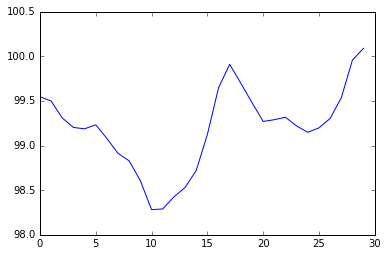

In [19]:
heart = []
files = []
i =0
for f in sorted(os.listdir(path)):
    i+=1
    filepath = path + '/' + f
    #print filepath
    try:
        ds = dicom.read_file(filepath, force=True)
        data = ds.pixel_array
        meanheart = data.mean()
        heart.append(meanheart)
        files.append(filepath)
        #plt.imshow(data, cmap=plt.cm.bone)
        #print i, meanheart, f
        #plt.show()
    except:
        continue
    
plt.plot(heart)

In [20]:
filessorted = np.array(files)[np.argsort(heart)]

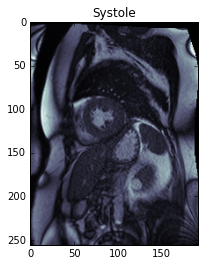

In [21]:
ds = dicom.read_file(filessorted[0])
data1 = ds.pixel_array
plt.figure()
plt.title('Systole')
plt.imshow(data1, cmap=plt.cm.bone)

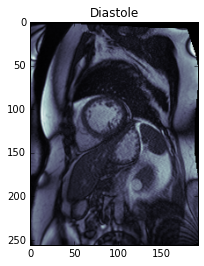

In [22]:
ds = dicom.read_file(filessorted[-1])
data2 = ds.pixel_array
plt.figure()
plt.title('Diastole')
plt.imshow(data2, cmap=plt.cm.bone)
savefig('test.png', bbox_inches='tight')

In [23]:
D = data2.astype(int) - data1.astype(int)

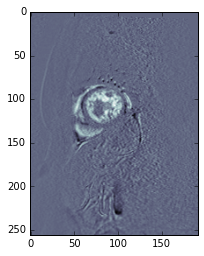

In [24]:
plt.figure()
plt.imshow(D,cmap=plt.cm.bone)
savefig('test1.png', bbox_inches='tight')

In [25]:
img=mpimg.imread('test.png')

In [26]:
# Read image
im = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
 

In [48]:
params = cv2.SimpleBlobDetector_Params()

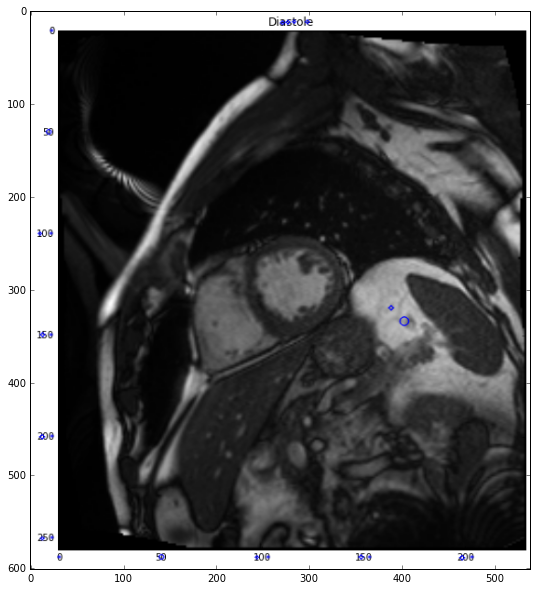

In [49]:
# Change thresholds
params.minThreshold = 150;
params.maxThreshold = 1000;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 10
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector(params)
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 

plt.figure(figsize=(20,10))
plt.imshow(im_with_keypoints)

In [ ]:
image = cv2.imread("test.png")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT, 1.2, 100)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
    # show the output image
    plt.imshow(np.hstack([image, output]))
    #cv2.waitKey(0)

In [ ]:
image = cv2.imread("test1.png")
plt.imshow(image)

In [ ]:
img = cv2.imread('test1.png');
#img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(img,1,100,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,3)

#titles = ['Original Image', 'Global Thresholding (v = 127)',
#         'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [image, th1, th2, th3]

plt.imshow(th3)

In [ ]:
2